## Demonstrating Machine learning with MlFLOW

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

In [2]:
import sys
import os
#from ensurepip import version
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import mlflow
#import mlflow.sklearn
import logging
import warnings

# 
sys.path.append(os.path.abspath(os.path.join('..')))

logging.basicConfig (level = logging .WARN )
logger= logging.getLogger (__name__ )

#Get url from DVC
import dvc.api

path='data/train.csv'
repo ='C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
rev = 'ver_4'
data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
#df = pd.read_csv(data_url)

mlflow.set_experiment('Sales prediction and forcasting')

def eval_metrics (actual, pred ) :
    rnse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred )
    r2 = r2_score(actual, pred)
    return rnse , mae , r2



INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [134]:
# main 
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)
# Read the samrt ad from the remote repository
df_train = pd.read_csv (data_url)
#df_train = get_data('ver_4')
# Log data params
mlflow.log_param ('data_url', data_url)
mlflow.log_param ('data version', rev )
mlflow.log_param ('input_rows', df_train.shape [0] )
mlflow.log_param ('input_cols', df_train.shape [1])

# checking
# choosing columns 
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']
#
feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = df_train[columns].sample(sample_size)

#
lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()
# scaling
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)
## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

# training
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

# score of the model
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

#
cols_x = pd.DataFrame (list(train_x.columns))
cols_x.to_csv('features.csv', header = False , index = False )
mlflow.log_artifact('features.csv')

cols_y = pd.DataFrame (list(train_y.columns))
cols_y.to_csv('targets.csv', header = False , index = False )
mlflow.log_artifact('targets.csv')

#alpha = float(sys.argv[1]) if len(sys.argv)>1 else 0.5
#l1_ratio = float(sys.argv[2]) if len(sys.argv)>2 else 0.5
#lr = ElasticNet(alpha = alpha , l1_ratio = l1_ratio , random_state = 42 )
#lr.fit ( train_x , train_y )

#Write scores to a file
with open("metrics.txt", 'w') as outfile:
    outfile.write("an_absolute_error: %2.1f%%\n" %rfr_rmse)
    outfile.write("r2_score: %2.1f%%\n" %score)
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 332285 to 708709
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int64  
 6   WeekOfYear           1000 non-null   int64  
 7   Month                1000 non-null   int64  
 8   Year                 1000 non-null   int64  
 9   StoreType            1000 non-null   int32  
 10  Assortment           1000 non-null   int32  
 11  CompetitionDistance  1000 non-null   float64
 12  Promo2               1000 non-null   int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 101.6 KB
Prediction Score of the Model is 66.41%


In [122]:
!mlflow ui

^C


#  Prediction of store sales (task -2)
Prediction of sales is the central task in this challenge. you want to predict daily sales in various stores up to 6 weeks ahead of time.

## Import the libraries and the dataset

In [3]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

In [45]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pickle 
# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

### importing Scripts and modules

In [5]:
from utility import ReadData
from  Preprocessing import dataPreprocess
# from logger import App_Logger
from data_info import DataInfo
import plotfunction
import util as u

INFO:root:data info: displying datatype


In [6]:
import warnings
warnings.filterwarnings('ignore')
import dvc.api

## Exploring and access the dataset based on DVC tag

In [7]:
def get_data(tag, 
            path='data/train.csv', 
            repo ='C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [8]:
df_train = get_data('ver_4')

In [9]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [10]:
u.get_null_percentage(df_train)
#df.isnull().any().sum()

INFO:root:util.py - calculate null percentage: 0.0


the null percentage is 0.0


0.0

In [11]:
data_info = DataInfo(df_train)

In [12]:
data_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  float64
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  WeekOfYear                 1017209 non-null  int64  
 12  Dates                      1017209 non-null  object 
 13  StoreType   

INFO:root:data info: displying detail information 


In [59]:
data_info.shape_df()

Dataframe contains 1017209 rows and 23 columns


INFO:root:data info: displying shape of the dataframe


# Adding features 

#### Need to extract
- weekdays
- weekends
- number of days to holidays
- Number of days after holiday
- Beginning of month, mid month and ending of month (think of more features to extract), extra marks for it

In [13]:
train_df = df_train.copy()

In [14]:
# changing datatype
train_df['Dates'] = pd.to_datetime(train_df['Dates'])

In [15]:
# adding weekdays
train_df['weekdays'] = train_df['Dates'].dt.weekday + 1

In [ ]:
train_df['weekdays'].head(1)

In [16]:
# Adding weekends
train_df['Weekends'] = train_df['Dates'].dt.weekday + 1

In [17]:
train_df['Weekends'] = train_df['Weekends'].mask(train_df['Weekends'].values >= 6, 0)

In [66]:
# checking weekends 
train_df.query('Weekends == 0').head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,weekdays,Weekends
5,1,7,0.0,0.0,0,0,0,0,2015,7,...,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0
6,1,6,4364.0,500.0,1,0,0,0,2015,7,...,1270.0,9.0,2008.0,0,0.0,0.0,0,8.728000,6,0
12,1,7,0.0,0.0,0,0,0,0,2015,7,...,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0
13,1,6,4406.0,512.0,1,0,0,0,2015,7,...,1270.0,9.0,2008.0,0,0.0,0.0,0,8.605469,6,0
19,1,7,0.0,0.0,0,0,0,0,2015,7,...,1270.0,9.0,2008.0,0,0.0,0.0,0,0.000000,7,0


In [20]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'Dates', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'SalesperCustomer', 'weekdays', 'Weekends'],
      dtype='object')

# selecting features 

In [21]:
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = train_df[columns].sample(sample_size)


## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
736448,809,5,1,0,0,29,35,8,2014,a,a,12770.0,0
519673,570,6,1,0,0,7,23,6,2014,a,a,180.0,0
596103,655,5,0,1,0,1,18,5,2015,d,c,960.0,1
279075,308,2,1,1,0,27,5,1,2015,a,a,1070.0,1
573633,629,6,1,0,0,27,17,4,2013,d,a,510.0,1


### Label encoding

In [22]:

lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 736448 to 262642
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int64  
 6   WeekOfYear           1000 non-null   int64  
 7   Month                1000 non-null   int64  
 8   Year                 1000 non-null   int64  
 9   StoreType            1000 non-null   int32  
 10  Assortment           1000 non-null   int32  
 11  CompetitionDistance  1000 non-null   float64
 12  Promo2               1000 non-null   int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 101.6 KB


In [23]:
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
736448,809,5,1,0,0,29,35,8,2014,0,0,12770.0,0
519673,570,6,1,0,0,7,23,6,2014,0,0,180.0,0
596103,655,5,0,1,0,1,18,5,2015,3,2,960.0,1
279075,308,2,1,1,0,27,5,1,2015,0,0,1070.0,1
573633,629,6,1,0,0,27,17,4,2013,3,0,510.0,1


### Scaling 

In [24]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)

In [25]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [69]:
### training

In [36]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [37]:
# score of the model
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 66.21%


## Building models with sklearn pipelines


In [59]:
## Prepare the training and test features
x = train_x
y = train_y

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

#### creating pipeline

In [60]:
rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])

##### fitting

In [61]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regretion', DecisionTreeRegressor(random_state=0))])

In [42]:
# printing score
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

Prediction Score of the RandomForestRegretion is 59.4%
Prediction Score of the LinearRegretion is 56.74%
Prediction Score of the DecisionTree is 28.92%


## loss function

In [65]:
rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)

rfr_rmse, rft_mae, _ = u.eval_metrics(y_test, rfr_prediction)
lr_rmse, lr_mae, _ = u.eval_metrics(y_test, lr_prediction)
dt_rmse, dt_mae, _ = u.eval_metrics(y_test, dt_prediction)

# print
print(f"RandomForest Mean Square Loss : {rfr_rmse}")
print(f"Linear Mean Square Loss : {lr_rmse}")
print(f"DecisionTree Mean Square Loss : {dt_rmse }")
print(f"RandomForest mae : {rft_mae}")


RandomForest Mean Square Loss : 1799.7056689228261
Linear Mean Square Loss : 1887.620228139434
DecisionTree Mean Square Loss : 2616.4447385717895
RandomForest mae : 1225.2208622131557


## Post analysis

Text(0.5, 1.0, 'RandomForestRegretion Feature Importance')

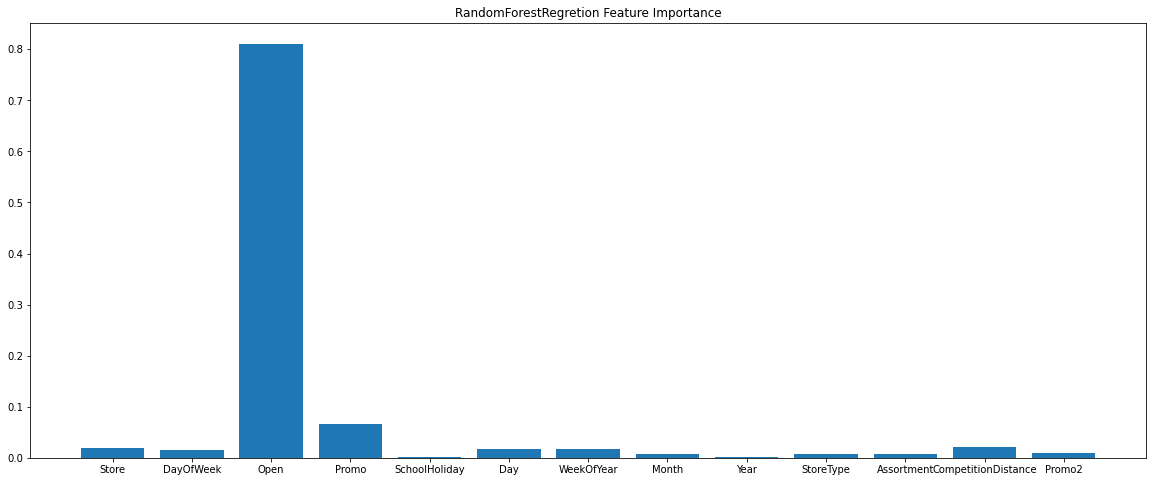

In [52]:
important_features = rfr[1].feature_importances_
#plot.bar(feature_columns, important_features, 'RandomForestRegretion Feature Importance')
plt.figure(figsize=(20, 8))
plt.bar(feature_columns, important_features)
plt.title('RandomForestRegretion Feature Importance')

Text(0.5, 1.0, 'LinearRegretion Feature Importance')

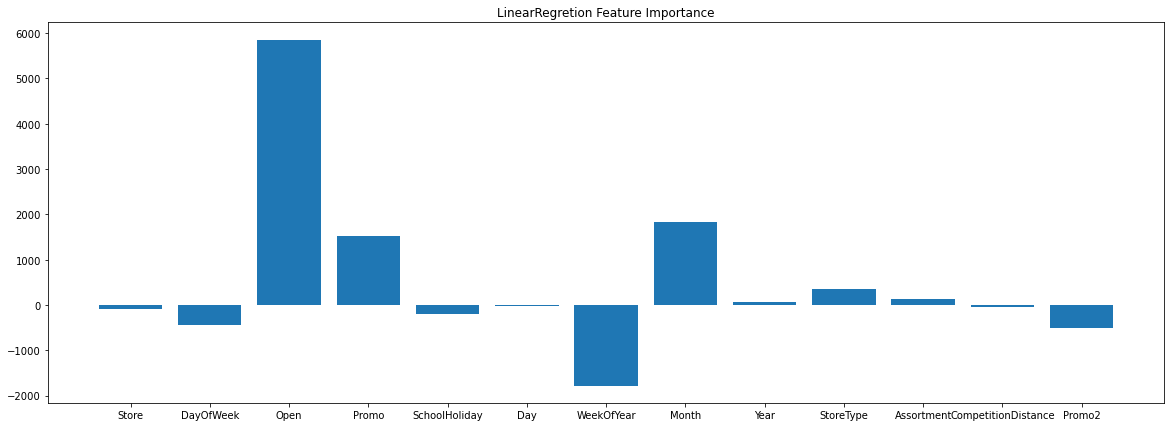

In [57]:
important_features = lr[1].coef_[0] 
plt.figure(figsize=(20, 7))
plt.bar(feature_columns, list(important_features))
plt.title("LinearRegretion Feature Importance")


<BarContainer object of 13 artists>

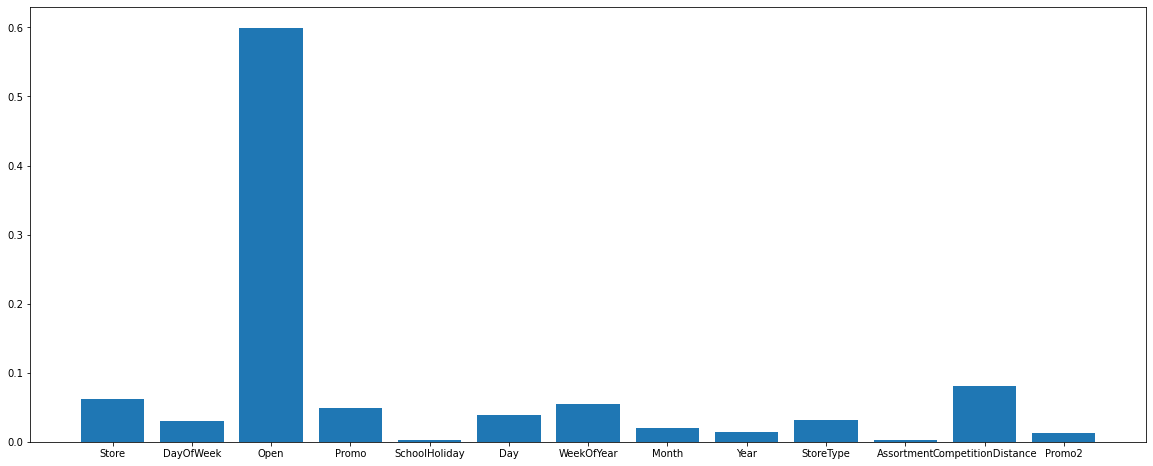

In [54]:
important_features = dt[1].feature_importances_
plt.figure(figsize=(20, 8))
plt.bar(feature_columns, important_features)

## summaary of the post analysis
- some features are extremly important
- open is the most important feature 
- the promo has also great impact on the modeling 
- few features shows no positive impact on the sales

## Serialize models


In [99]:
## use picke to dump mode
## decomment picke to save the model
from time import gmtime, strftime
time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
reg_model_file_name = f'../models/reg-{time}.pkl'
lr_model_file_name = f'../models/lt-{time}.pkl'
dt_model_file_name = f'../models/dt-{time}.pkl'

files = [reg_model_file_name, lr_model_file_name, dt_model_file_name]
models = [rfr, lr, dt]

print(reg_model_file_name)


for i in range(len(files)):
    pickle.dump(models[i], open(files[i], 'wb'))

../models/reg-2022-09-08-08-12-03.pkl


In [100]:
dt_file = '../models/dt-2022-09-06-13-04-11.pkl'
dt_model = pickle.load(open(dt_file, 'rb'))

In [101]:
dt_score = dt_model.score(X_test, y_test)
dt_score

0.24108249140662497